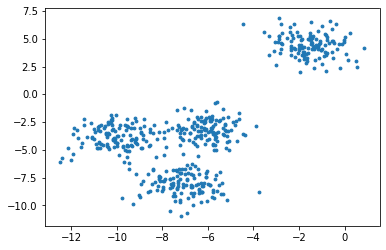

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 自己创建数据集
x,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

fig,ax1 = plt.subplots(1)
ax1.scatter(x[:,0],x[:,1],marker='o',s=8)
plt.show()

In [5]:
# 如果我们要看看这个点的分布，怎么办？

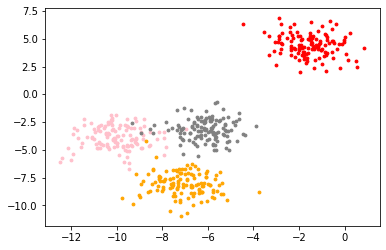

In [6]:
color = ["red","pink","orange","gray"]
fig,ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(x[y==i,0],x[y==i,1],marker='o',s=8,c=color[i])
plt.show()

#### 基于这个分类，我们来使用kmeans进行聚类，首先，我们要猜测一下，这个数据中有几簇？

In [7]:
from sklearn.cluster import KMeans

n_clusters = 3

# KMeans 因为并不需要建立模型或者预测结果，因此我们只需要fit就能够得到聚类的结果了
# KMeans 也有接口predict和fit_predict，表示学习数据x 并对x的类进行预测
# 但所得到的结果和我们不调用predict，直接fit之后调用属性labels_一模一样。
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(x)

y_pred = cluster.labels_
y_pred

pre = cluster.fit_predict(x)
pre == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

我们什么时候需要predict呢？当数据量太大的时候！
其实我们不必使用所有的数据来寻找质心，少量的数据就可以帮助我们确定质心了
当我们的数据量非常大的时候，我们可以使部分数据来帮助我们确认质心，剩下的数据的聚类结果，使用predict来调用

In [8]:
cluster_smallsub = KMeans(n_clusters=n_clusters,random_state=0).fit(x[:200])
y_pred_ = cluster_smallsub.predict(x)
y_pred == y_pred_
# 结果不完全相似，这是因为数据量少的原因，原理是可行的。

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False,

In [9]:
# 重要属性cluster_centers_,查看质心
centroid = cluster.cluster_centers_
centroid

array([[-7.09306648, -8.10994454],
       [-1.54234022,  4.43517599],
       [-8.0862351 , -3.5179868 ]])

In [7]:
centroid.shape

(3, 2)

In [10]:
# 重要属性inertia_,查看总距离平方和
inertia = cluster.inertia_
inertia

1903.4503741659223

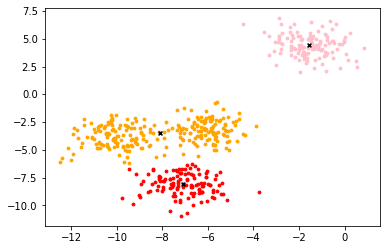

In [11]:
color = ["red","pink","orange","gray"]
fig,ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(x[y_pred==i,0],x[y_pred==i,1],marker='o',s=8,c=color[i])

ax1.scatter(centroid[:,0],centroid[:,1],marker='x',s=15,c="black")
plt.show()

## 聚类算法的模型评估指标

### 当真是标签未知的时候：轮廓系数

In [16]:
# 我们来看看轮廓系数在我们自建数据集上的表现如何
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

silhouette_score(x,y_pred)

0.5882004012129721

In [18]:
silhouette_score(x,cluster.labels_)

0.5882004012129721

In [19]:
silhouette_samples(x,y_pred)

array([ 0.62982017,  0.5034877 ,  0.56148795,  0.84881844,  0.56034142,
        0.78740319,  0.39254042,  0.4424015 ,  0.48582704,  0.41586457,
        0.62497924,  0.75540751,  0.50080674,  0.8452256 ,  0.54730432,
        0.60232423,  0.54574988,  0.68789747,  0.86605921,  0.25389678,
        0.49316173,  0.47993065,  0.2222642 ,  0.8096265 ,  0.54091189,
        0.30638567,  0.88557311,  0.84050532,  0.52855895,  0.49260117,
        0.65291019,  0.85602282,  0.47734375,  0.60418857,  0.44210292,
        0.6835351 ,  0.44776257,  0.423086  ,  0.6350923 ,  0.4060121 ,
        0.54540657,  0.5628461 ,  0.78366733,  0.37063114,  0.35132112,
        0.74493029,  0.53691616,  0.36724842,  0.87717083,  0.79594363,
        0.84641859,  0.38341344,  0.42043012,  0.4024608 ,  0.64639537,
        0.46244151,  0.31853572,  0.10047008,  0.37909034,  0.56424494,
        0.86153448,  0.82630007,  0.53288582,  0.35699772,  0.86994617,
        0.52259763,  0.71296285,  0.5269434 ,  0.42375504,  0.31

轮廓系数有很多优点，它在有限的空间中取值，使得我们对模型的聚类效果有一个“参考”。并且，轮廓系数对数据的分布没有假设，因此在很多数据集上表现良好。但它在每个簇的分割比较清洗时表现最好。但轮廓系数也有缺陷，它在凸型的类上表现会虚高